데이터주무르기 5장. /전국/카토그램cartogram  
책과다른 데이터로 어떻게든 해보려고 했으나..OTZ
## 인구 소별 위기 지역 분석

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 5-2 데이터 확보하고 정리하기

In [2]:
df = pd.read_csv('./data/성별, 연령별 인구 - 시군구(2019).csv', encoding='euc-kr')
df.head()

,광역시도,시군구,행정구,구분,합계,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,NaN,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
1,서울,소계,NaN,남자,4386287,505543,201751,233761,377349,341858,...,335606,385491,354886,349208,313417,218378,170303,126711,66754,30757
2,서울,소계,NaN,여자,4710614,477548,200592,314484,391064,345946,...,342054,396964,376372,379065,351458,246872,199939,153296,96609,66035
3,서울,종로구,NaN,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747


In [3]:
#컬럼명 변경
df.rename({'시군구':'시도', '합계':'인구수'}, inplace=True, axis=1)
df.head()

,광역시도,시도,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
0,서울,소계,NaN,계,9096901,983091,402343,548245,768413,687804,...,677660,782455,731258,728273,664875,465250,370242,280007,163363,96792
1,서울,소계,NaN,남자,4386287,505543,201751,233761,377349,341858,...,335606,385491,354886,349208,313417,218378,170303,126711,66754,30757
2,서울,소계,NaN,여자,4710614,477548,200592,314484,391064,345946,...,342054,396964,376372,379065,351458,246872,199939,153296,96609,66035
3,서울,종로구,NaN,계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747


In [4]:
#'소계'행 삭제  (소계 아닌것만 모아df)
df = df[(df['시도'] != '소계') & (df['행정구'] != '소계')]

In [5]:
#승모 왜 '구분'을 넣어야 하는가? 안넣으면 합계합계합계가 나오긴하는데; 왜 구분을 ; ???
# 컬럼구분의 계를 합계로 바꾸려고
df.loc[df['구분'] == '계', '구분'] = '합계' 

In [6]:
df.head()  #소계삭제확인

,광역시도,시도,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
3,서울,종로구,NaN,합계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,4341,5709,5511,5773,5021,3369,2659,2290,1387,747
5,서울,종로구,NaN,여자,71055,6021,2998,5586,5805,4712,...,4693,6075,5951,6008,5104,3688,3301,2987,1954,1318
6,서울,중구,NaN,합계,115665,9839,3896,7511,10304,9636,...,7836,8903,9313,9786,9002,6211,5077,4201,2581,1695
7,서울,중구,NaN,남자,55820,4988,1896,3103,5115,4790,...,4054,4423,4587,4830,4430,2998,2295,1795,1003,523


In [7]:
df['행정구'].isnull()[3]  #True _ [3]서울종로구의 행정구는 nan값있다

True

In [8]:
# 행정구 값이 있는 데이터를 df['시도']로 옮기기 
for n in df.index:
    if df['행정구'].isnull()[n] == False:
        df['시도'][n] = df['행정구'][n][1:]  #시도 뒤로 행정구내용을 더해주는게 아니라 바꾸는거임.뒤에 포문에 알아서바꿔주는코드가있다. 빈칸있어서 [1:]

In [9]:
#population.fillna('', inplace=True)
#population['시군행정구'] = population[['시군구', '행정구']].apply(''.join, axis=1) #이걸썼더니 시군행정구 개판 ㅋㅋ
#if population['행정구']==nan ? 그대로두고 : '시군구'+'행정구' #삼항식쓰고싶지만
#pop['시군구'] = [s[1:] for s in pop['시군구'].values] #교수님코드


In [10]:
#컬럼행정구 장안구 확인  왜 df.loc[df['행정구'] == '장안구'] 이렇게 하면 같은결과 나옴
df[df['행정구'] == ' 장안구']
# df[df['행정구'] == ' 장안구'].loc[255] #인덱스번호를 넣으면 해당 행의 결과가 쭈욱 나온다
# df['시도'][df'행정구'] == '장안구'] #장안구가 몇몇인덱스인지 알려준다_ 원하는필터링에 컬럼값만 받으려고하면

,광역시도,시도,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
255,경기,장안구,장안구,합계,262957,33148,14970,17775,20325,14990,...,20450,25477,25346,22674,16863,10534,8217,6633,4422,2768
256,경기,장안구,장안구,남자,130792,17081,7759,8738,11095,7958,...,10065,12568,12372,11452,8371,5023,3754,2832,1713,853
257,경기,장안구,장안구,여자,132165,16067,7211,9037,9230,7032,...,10385,12909,12974,11222,8492,5511,4463,3801,2709,1915


In [11]:
df.loc[df['구분'] == '합계']  # df[df['구분'] == '합계'] 이렇게 해도 같은 결과 나옴 # 그냥 잘 찍혔나확인

,광역시도,시도,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,40~44세,45~49세,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상
3,서울,종로구,NaN,합계,136649,12204,5801,9816,11972,9459,...,9034,11784,11462,11781,10125,7057,5960,5277,3341,2065
6,서울,중구,NaN,합계,115665,9839,3896,7511,10304,9636,...,7836,8903,9313,9786,9002,6211,5077,4201,2581,1695
9,서울,용산구,NaN,합계,204196,19559,7501,11472,17506,17246,...,14951,17554,16489,16246,14708,9927,8197,7027,4763,3009
12,서울,성동구,NaN,합계,283330,30197,10671,18283,24581,23496,...,20848,23252,22648,23060,20026,13394,10709,8671,5088,2895
15,서울,광진구,NaN,합계,331747,32469,13876,23459,34142,28298,...,23864,27457,26699,26245,23174,15295,11954,9070,5249,3044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,경남,함양군,NaN,합계,35496,3224,1054,1046,1185,1120,...,1753,2581,3074,3519,3642,2798,2568,2800,2241,1398
819,경남,거창군,NaN,합계,56403,6420,2287,2155,2204,2183,...,3199,4315,4890,5259,5163,3918,3393,3484,2837,1793
822,경남,합천군,NaN,합계,40085,2768,945,1191,1269,1147,...,1640,2453,3160,4154,4347,3637,3279,3725,3055,1851
828,제주,제주시,NaN,합계,458548,72159,24777,23093,28620,26157,...,36421,43442,39418,36067,29781,18797,15652,12474,8686,6356


### 5-3 인구 소멸 위기지역 계산하고 데이터정리하기

In [12]:
#컬럼추가
df['20~39세'] = df['20~24세'] + df['25~29세'] + df['30~34세'] + df['35~39세']
df['65세이상'] = df['65~69세'] + df['70~74세'] + df['75~79세'] + df['80~84세'] + df['85세이상']

In [13]:
df.head() #컬럼추가확인

,광역시도,시도,행정구,구분,인구수,15세미만,15~19세,20~24세,25~29세,30~34세,...,50~54세,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,20~39세,65세이상
3,서울,종로구,NaN,합계,136649,12204,5801,9816,11972,9459,...,11462,11781,10125,7057,5960,5277,3341,2065,40758,23700
4,서울,종로구,NaN,남자,65594,6183,2803,4230,6167,4747,...,5511,5773,5021,3369,2659,2290,1387,747,19801,10452
5,서울,종로구,NaN,여자,71055,6021,2998,5586,5805,4712,...,5951,6008,5104,3688,3301,2987,1954,1318,20957,13248
6,서울,중구,NaN,합계,115665,9839,3896,7511,10304,9636,...,9313,9786,9002,6211,5077,4201,2581,1695,37325,19765
7,서울,중구,NaN,남자,55820,4988,1896,3103,5115,4790,...,4587,4830,4430,2998,2295,1795,1003,523,17998,8614


In [14]:
#마법의 키워드!!  필요한것만 쏙쏙ㅋㅋ
pop = pd.pivot_table(df, index=['광역시도','시도'], columns=['구분'], values=['인구수','20~39세','65세이상'])
pop

20~39세                65세이상                   인구수                
구분            남자     여자     합계     남자     여자     합계      남자      여자      합계
광역시도 시도                                                                    
강원    강릉시  25015  20993  46008  17378  23119  40497  101154  101903  203057
      고성군   2307   1699   4006   2957   4048   7005   11933   11688   23621
      동해시   8801   7510  16311   7075   9077  16152   42093   41795   83888
      삼척시   7148   5280  12428   6314   8639  14953   31630   30203   61833
      속초시   8517   7411  15928   5866   8144  14010   37488   38814   76302
...          ...    ...    ...    ...    ...    ...     ...     ...     ...
충북    충주시  25700  21483  47183  16091  21483  37574  101311   99746  201057
     상당구   20426  19444  39870  11028  14557  25585   82711   85162  167873
     서원구   27838  25609  53447  11415  15049  26464   97386   99616  197002
     청원구   30875  26880  57755   9432  12476  21908   95997   92726  188723
     흥덕구   38895  36141  75036  11543  14797  26340  124808  124118  248926

[250 rows x 9 columns]

In [15]:
#소멸비율컬럼추가 = 가임기여성/(65세이상/2)
pop['소멸비율'] = pop['20~39세','여자'] / (pop['65세이상','합계'] / 2)
pop.head()

20~39세                65세이상                   인구수                  \
구분            남자     여자     합계     남자     여자     합계      남자      여자      합계   
광역시도 시도                                                                       
강원    강릉시  25015  20993  46008  17378  23119  40497  101154  101903  203057   
      고성군   2307   1699   4006   2957   4048   7005   11933   11688   23621   
      동해시   8801   7510  16311   7075   9077  16152   42093   41795   83888   
      삼척시   7148   5280  12428   6314   8639  14953   31630   30203   61833   
      속초시   8517   7411  15928   5866   8144  14010   37488   38814   76302   

               소멸비율  
구분                   
광역시도 시도              
강원    강릉시  1.036768  
      고성군  0.485082  
      동해시  0.929916  
      삼척시  0.706213  
      속초시  1.057959

In [16]:
# 소멸위기지역컬럼추가 _ 소멸비율이 1미만이면 '소멸위기지역'으로 구분
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20~39세                65세이상                   인구수                  \
구분            남자     여자     합계     남자     여자     합계      남자      여자      합계   
광역시도 시도                                                                       
강원    강릉시  25015  20993  46008  17378  23119  40497  101154  101903  203057   
      고성군   2307   1699   4006   2957   4048   7005   11933   11688   23621   
      동해시   8801   7510  16311   7075   9077  16152   42093   41795   83888   
      삼척시   7148   5280  12428   6314   8639  14953   31630   30203   61833   
      속초시   8517   7411  15928   5866   8144  14010   37488   38814   76302   

               소멸비율 소멸위기지역  
구분                          
광역시도 시도                     
강원    강릉시  1.036768  False  
      고성군  0.485082   True  
      동해시  0.929916   True  
      삼척시  0.706213   True  
      속초시  1.057959  False

In [17]:
#소멸위기지역의 리스트 뽑기get_level_values가 무엇인가???
pop[pop['소멸위기지역'] == True].index.get_level_values(1) #(1)은 컬럼시도

Index([' 고성군', ' 동해시', ' 삼척시', ' 양구군', ' 양양군', ' 영월군', ' 인제군', ' 정선군', ' 철원군',
       ' 태백시', ' 평창군', ' 홍천군', ' 화천군', ' 횡성군', ' 가평군', ' 양평군', ' 여주시', ' 연천군',
       ' 거창군', ' 고성군', ' 남해군', ' 밀양시', ' 사천시', ' 산청군', ' 의령군', ' 창녕군', ' 하동군',
       ' 함안군', ' 함양군', ' 합천군', ' 경주시', ' 고령군', ' 군위군', ' 김천시', ' 문경시', ' 봉화군',
       ' 상주시', ' 성주군', ' 안동시', ' 영덕군', ' 영양군', ' 영주시', ' 영천시', ' 예천군', ' 울릉군',
       ' 울진군', ' 의성군', ' 청도군', ' 청송군', ' 동구', ' 영도구', ' 중구', ' 강화군', ' 옹진군',
       ' 강진군', ' 고흥군', ' 곡성군', ' 구례군', ' 담양군', ' 보성군', ' 신안군', ' 영광군', ' 영암군',
       ' 완도군', ' 장성군', ' 장흥군', ' 진도군', ' 함평군', ' 해남군', ' 화순군', ' 고창군', ' 김제시',
       ' 남원시', ' 무주군', ' 부안군', ' 순창군', ' 완주군', ' 임실군', ' 장수군', ' 정읍시', ' 진안군',
       ' 공주시', ' 금산군', ' 논산시', ' 보령시', ' 부여군', ' 서천군', ' 예산군', ' 청양군', ' 태안군',
       ' 홍성군', ' 괴산군', ' 단양군', ' 보은군', ' 영동군', ' 옥천군', ' 제천시'],
      dtype='object', name='시도')

In [18]:
pop[pop['소멸위기지역'] == True].index.get_level_values(0) #(0)은 컬럼광역시도 구나~_~

Index(['강원', '강원', '강원', '강원', '강원', '강원', '강원', '강원', '강원', '강원', '강원', '강원',
       '강원', '강원', '경기', '경기', '경기', '경기', '경남', '경남', '경남', '경남', '경남', '경남',
       '경남', '경남', '경남', '경남', '경남', '경남', '경북', '경북', '경북', '경북', '경북', '경북',
       '경북', '경북', '경북', '경북', '경북', '경북', '경북', '경북', '경북', '경북', '경북', '경북',
       '경북', '부산', '부산', '부산', '인천', '인천', '전남', '전남', '전남', '전남', '전남', '전남',
       '전남', '전남', '전남', '전남', '전남', '전남', '전남', '전남', '전남', '전남', '전북', '전북',
       '전북', '전북', '전북', '전북', '전북', '전북', '전북', '전북', '전북', '충남', '충남', '충남',
       '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충북', '충북', '충북', '충북', '충북',
       '충북'],
      dtype='object', name='광역시도')

In [19]:
# len으로 묶으면 '소멸위기지역'갯수가 나옴
len(pop[pop['소멸위기지역']==True].index.get_level_values(1))
#2018년 83개지역에서 2019년 97개지역으로 늘었음

97

In [20]:
#지도로 시각화 하기 위한 리셋인덱스
pop.reset_index(inplace=True)
pop.head()

광역시도    시도 20~39세                65세이상                   인구수          \
구분                남자     여자     합계     남자     여자     합계      남자      여자   
0    강원   강릉시  25015  20993  46008  17378  23119  40497  101154  101903   
1    강원   고성군   2307   1699   4006   2957   4048   7005   11933   11688   
2    강원   동해시   8801   7510  16311   7075   9077  16152   42093   41795   
3    강원   삼척시   7148   5280  12428   6314   8639  14953   31630   30203   
4    강원   속초시   8517   7411  15928   5866   8144  14010   37488   38814   

                소멸비율 소멸위기지역  
구분      합계                   
0   203057  1.036768  False  
1    23621  0.485082   True  
2    83888  0.929916   True  
3    61833  0.706213   True  
4    76302  1.057959  False

In [21]:
#pivot_table에 의해 다단으로 구성된 데이터프레임 컬럼 정리하기(컬럼하나로 합침)
tmp_coloumns = [pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n] for n in range(0,len(pop.columns.get_level_values(0)))]

In [22]:
tmp_coloumns

['광역시도',
 '시도',
 '20~39세남자',
 '20~39세여자',
 '20~39세합계',
 '65세이상남자',
 '65세이상여자',
 '65세이상합계',
 '인구수남자',
 '인구수여자',
 '인구수합계',
 '소멸비율',
 '소멸위기지역']

In [23]:
pop.columns = tmp_coloumns

In [24]:
pop.head()

,광역시도,시도,20~39세남자,20~39세여자,20~39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원,강릉시,25015,20993,46008,17378,23119,40497,101154,101903,203057,1.036768,False
1,강원,고성군,2307,1699,4006,2957,4048,7005,11933,11688,23621,0.485082,True
2,강원,동해시,8801,7510,16311,7075,9077,16152,42093,41795,83888,0.929916,True
3,강원,삼척시,7148,5280,12428,6314,8639,14953,31630,30203,61833,0.706213,True
4,강원,속초시,8517,7411,15928,5866,8144,14010,37488,38814,76302,1.057959,False


In [25]:
pop.to_csv('./results/01a.인구소멸.csv', encoding='utf8')

In [26]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      250 non-null    object 
 1   시도        250 non-null    object 
 2   20~39세남자  250 non-null    int64  
 3   20~39세여자  250 non-null    int64  
 4   20~39세합계  250 non-null    int64  
 5   65세이상남자   250 non-null    int64  
 6   65세이상여자   250 non-null    int64  
 7   65세이상합계   250 non-null    int64  
 8   인구수남자     250 non-null    int64  
 9   인구수여자     250 non-null    int64  
 10  인구수합계     250 non-null    int64  
 11  소멸비율      250 non-null    float64
 12  소멸위기지역    250 non-null    bool   
dtypes: bool(1), float64(1), int64(9), object(2)
memory usage: 23.8+ KB


### 5-4,5 지도 시각화를 위해 지역별 고유ID만들기

In [27]:
pop['시도'].unique()

array([' 강릉시', ' 고성군', ' 동해시', ' 삼척시', ' 속초시', ' 양구군', ' 양양군', ' 영월군',
       ' 원주시', ' 인제군', ' 정선군', ' 철원군', ' 춘천시', ' 태백시', ' 평창군', ' 홍천군',
       ' 화천군', ' 횡성군', ' 가평군', ' 과천시', ' 광명시', ' 광주시', ' 구리시', ' 군포시',
       ' 김포시', ' 남양주시', ' 동두천시', ' 부천시', ' 시흥시', ' 안성시', ' 양주시', ' 양평군',
       ' 여주시', ' 연천군', ' 오산시', ' 의왕시', ' 의정부시', ' 이천시', ' 파주시', ' 평택시',
       ' 포천시', ' 하남시', ' 화성시', '권선구', '기흥구', '단원구', '덕양구', '동안구', '만안구',
       '분당구', '상록구', '수정구', '수지구', '영통구', '일산동구', '일산서구', '장안구', '중원구',
       '처인구', '팔달구', ' 거제시', ' 거창군', ' 김해시', ' 남해군', ' 밀양시', ' 사천시',
       ' 산청군', ' 양산시', ' 의령군', ' 진주시', ' 창녕군', ' 통영시', ' 하동군', ' 함안군',
       ' 함양군', ' 합천군', '마산합포구', '마산회원구', '성산구', '의창구', '진해구', ' 경산시',
       ' 경주시', ' 고령군', ' 구미시', ' 군위군', ' 김천시', ' 문경시', ' 봉화군', ' 상주시',
       ' 성주군', ' 안동시', ' 영덕군', ' 영양군', ' 영주시', ' 영천시', ' 예천군', ' 울릉군',
       ' 울진군', ' 의성군', ' 청도군', ' 청송군', ' 칠곡군', '남구', '북구', ' 광산구', ' 남구',
       ' 동구', ' 북구', ' 서구', ' 달서구', ' 달성군', ' 수성구', ' 중구', ' 대덕구', ' 유성

In [29]:
si_name = [None] * len(pop)
tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'],
                '성남':['수정구','중원구','분당구'],
                '안양':['만안구','동안구'],
                '안산':['상록구','단원구'],
                '고양':['덕양구','일산동구','일산서구'],
                '용인':['처인구', '기흥구', '수지구'],
                '청주':['상당구','서원구','흥덕구','청원구'],
                '천안':['동남구','서북구'],
                '전주':['완산구','덕진구'],
                '포항':['남구', '북구'],
                '창원':['의창구','성산구','진해구','마산합포구','마산회원구']}

In [30]:
tmp_gu_dict.items()

dict_items([('수원', ['장안구', '권선구', '팔달구', '영통구']), ('성남', ['수정구', '중원구', '분당구']), ('안양', ['만안구', '동안구']), ('안산', ['상록구', '단원구']), ('고양', ['덕양구', '일산동구', '일산서구']), ('용인', ['처인구', '기흥구', '수지구']), ('청주', ['상당구', '서원구', '흥덕구', '청원구']), ('천안', ['동남구', '서북구']), ('전주', ['완산구', '덕진구']), ('포항', ['남구', '북구']), ('창원', ['의창구', '성산구', '진해구', '마산합포구', '마산회원구'])])

In [31]:
#자치구의 이름이 같은 경우가 많음/ 단, 고성군은 강원도와 경남 두군데 있음
for n in pop.index:
    if pop['광역시도'][n] not in ['서울', '광주', '대구', '대전', '부산', '세종', '울산', '인천']:
        if pop['시도'][n][:-1] == ' 고성' and pop['광역시도'][n] == '강원':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]== ' 고성' and pop['광역시도'][n] == '경남':
            si_name[n] = '고성(경남)'
        else:
            si_name[n] = pop['시도'][n][1:-1]

        for keys, values in tmp_gu_dict.items():
            if pop['시도'][n] in values:
                if len(pop['시도'][n]) == 2:
                    si_name[n] = keys +' ' +pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                   si_name[n] = keys +' ' + pop['시도'][n][:-1]
    elif pop['광역시도'][n] == '세종':
        si_name[n] = '세종'
    else:
        if len(pop['시도'][n]) == 3:
            si_name[n] = pop['광역시도'][n][:2] +  pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] +  pop['시도'][n][:-1]

In [32]:
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '김포',
 '남양주',
 '동두천',
 '부천',
 '시흥',
 '안성',
 '양주',
 '양평',
 '여주',
 '연천',
 '오산',
 '의왕',
 '의정부',
 '이천',
 '파주',
 '평택',
 '포천',
 '하남',
 '화성',
 '수원 권선',
 '용인 기흥',
 '안산 단원',
 '고양 덕양',
 '안양 동안',
 '안양 만안',
 '성남 분당',
 '안산 상록',
 '성남 수정',
 '용인 수지',
 '수원 영통',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '수원 팔달',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '밀양',
 '사천',
 '산청',
 '양산',
 '의령',
 '진주',
 '창녕',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '창원 합포',
 '창원 회원',
 '창원 성산',
 '창원 의창',
 '창원 진해',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '문경',
 '봉화',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항 남구',
 '포항 북구',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성',
 '대구 중구',
 '대전 대덕',
 '대전 동구',
 '대전 서구',
 '대전 유성',
 '대

In [33]:
pop['ID'] = si_name

In [34]:
del pop['20~39세남자']
del pop['65세이상남자']
del pop['65세이상여자']
pop.head()

,광역시도,시도,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원,강릉시,20993,46008,40497,101154,101903,203057,1.036768,False,강릉
1,강원,고성군,1699,4006,7005,11933,11688,23621,0.485082,True,고성(강원)
2,강원,동해시,7510,16311,16152,42093,41795,83888,0.929916,True,동해
3,강원,삼척시,5280,12428,14953,31630,30203,61833,0.706213,True,삼척
4,강원,속초시,7411,15928,14010,37488,38814,76302,1.057959,False,속초


In [35]:
draw_korea_raw = pd.read_excel('./data/draw_korea_raw(수정).xlsx', encoding="euc-kr")
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,과천,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [36]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
#draw_korea_raw_stacked.reset_index(inplace=True)                    #왜 이걸 나눠서 했지? 아~ 어떤 변화가있는지?
#draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'},inplace=True)
draw_korea_raw_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[250 rows x 1 columns]

In [37]:
draw_korea_raw_stacked.reset_index(inplace=True) 
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [38]:
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'},inplace=True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [39]:
#변수이름변경
draw_korea = draw_korea_raw_stacked

In [40]:
#인천남구를 인천미추홀로변경.. 나눠서 보고싶어도 볼수가 없다;; 왜지??  여기도 왜 'ID'를 넣었지?
# 두번째 ID는 컬럼을 지정하는것이다 꼭 넣어야 에러안난다()
draw_korea.loc[draw_korea['ID'] == '인천 남구', 'ID'] = '인천 미추홀'

In [41]:
#변경된것 확인
draw_korea[draw_korea['ID'] == '인천 미추홀']

,y,x,ID
83,9,2,인천 미추홀


In [42]:
# 광역시도를 구분하는 경계선
BORDER_LINES = [
    [(5,1), (5,2), (6,2), (6,3), (11,3), (11,0)], #인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], #서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), (12,7), (12,6), (11,6), (11,5), (12,5), (12,4), (11,4), (11,3)], #경기도
    [(8,10), (8,11), (6,11), (6,12)], #강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], #충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], #전라북도
    [(13,5), (13,6), (16,6)], #대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)],#충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,10), (16,13)], #울산
    [(27,5), (27,6), (25,6)],
]

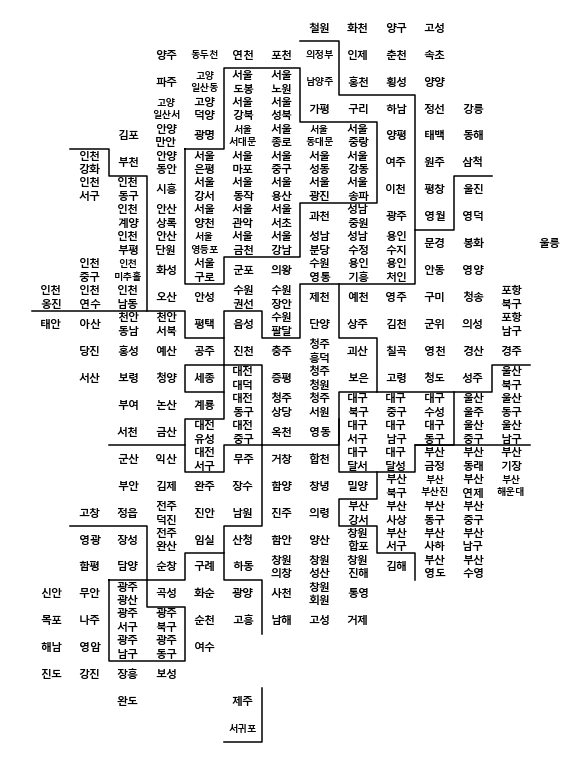

In [43]:
plt.figure(figsize=(8,11))

#지역이름표시
for idx, row in draw_korea.iterrows():
    #광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시 (중구,서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    #서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize=fontsize, ha='center', va='center', linespacing=linespacing)

#시도 경계 그리기
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis() #y축이 엑셀에서 0번이 시작하는 것과 matplotlib가 0이라고 인식하는 좌표가 서로 반대이기 때문에
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [44]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

In [45]:
tmp_list  #아무것도 안나온다 

[]

In [46]:
#책에 남는데이터가 있나봄; 남는데이터 넣으려고 이작업을?하나봄?
for tmp in tmp_list:
    pop2 = pop.drop(pop[pop['ID']==tmp].index)

print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))
set()

set()


set()

In [47]:
#좌표 합치기
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])
pop.head()

,광역시도,시도,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원,강릉시,20993,46008,40497,101154,101903,203057,1.036768,False,강릉,3,11
1,강원,고성군,1699,4006,7005,11933,11688,23621,0.485082,True,고성(강원),0,10
2,강원,동해시,7510,16311,16152,42093,41795,83888,0.929916,True,동해,4,11
3,강원,삼척시,5280,12428,14953,31630,30203,61833,0.706213,True,삼척,5,11
4,강원,속초시,7411,15928,14010,37488,38814,76302,1.057959,False,속초,1,10


In [48]:
# 좌표 나타내기
mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
mapdata

x,0,1,2,3,4,5,6,7,8,9,10,11,12,13
y,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40147.0,21700.0,19900.0,23621.0,NaN,NaN,NaN
1,NaN,NaN,NaN,207734.0,87789.0,39677.0,135779.0,425099.0,28219.0,265695.0,76302.0,NaN,NaN,NaN
2,NaN,NaN,NaN,420588.0,274192.0,315032.0,504967.0,658410.0,62531.0,41427.0,25125.0,NaN,NaN,NaN
3,NaN,NaN,NaN,280312.0,434496.0,294143.0,418403.0,55249.0,187625.0,254528.0,32728.0,203057.0,NaN,NaN
4,NaN,NaN,410416.0,232970.0,300735.0,291958.0,136649.0,327897.0,374640.0,105056.0,40467.0,83888.0,NaN,NaN
5,NaN,60622.0,789832.0,305176.0,447693.0,348755.0,115665.0,283330.0,403443.0,102076.0,329874.0,61833.0,NaN,NaN
6,NaN,515884.0,60791.0,451166.0,559359.0,374478.0,204196.0,331747.0,629275.0,200370.0,37624.0,44272.0,NaN,NaN
7,NaN,NaN,288422.0,329833.0,429819.0,472796.0,391520.0,52389.0,208514.0,350406.0,34342.0,33715.0,NaN,NaN
8,NaN,NaN,487471.0,292166.0,341509.0,219896.0,493492.0,450949.0,221396.0,343400.0,64832.0,28857.0,NaN,8200.0


In [49]:
masked_mapdata

masked_array(
  data=[[--, --, --, --, --, --, --, 40147.0, 21700.0, 19900.0, 23621.0,
         --, --, --],
        [--, --, --, 207734.0, 87789.0, 39677.0, 135779.0, 425099.0,
         28219.0, 265695.0, 76302.0, --, --, --],
        [--, --, --, 420588.0, 274192.0, 315032.0, 504967.0, 658410.0,
         62531.0, 41427.0, 25125.0, --, --, --],
        [--, --, --, 280312.0, 434496.0, 294143.0, 418403.0, 55249.0,
         187625.0, 254528.0, 32728.0, 203057.0, --, --],
        [--, --, 410416.0, 232970.0, 300735.0, 291958.0, 136649.0,
         327897.0, 374640.0, 105056.0, 40467.0, 83888.0, --, --],
        [--, 60622.0, 789832.0, 305176.0, 447693.0, 348755.0, 115665.0,
         283330.0, 403443.0, 102076.0, 329874.0, 61833.0, --, --],
        [--, 515884.0, 60791.0, 451166.0, 559359.0, 374478.0, 204196.0,
         331747.0, 629275.0, 200370.0, 37624.0, 44272.0, --, --],
        [--, --, 288422.0, 329833.0, 429819.0, 472796.0, 391520.0,
         52389.0, 208514.0, 350406.0, 34342.0, 3

## 카토그램 표현하기

In [50]:
mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

In [51]:
def drawKorea(targerData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targerData]) - min(blockedMap[targerData]))*0.25 + min(blockedMap[targerData])

    datalabel = targerData

    vmin = min(blockedMap[targerData])
    vmax = max(blockedMap[targerData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targerData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9,11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor = '#aaaaaa', linewidth=0.5)

    for idx, row in blockedMap.iterrows():

        # 광역시는 구이름이 겹치는 경우가 많아서 시단위 이름과 함께 표시
        if len(row['ID'].split()) == 2:
            dispname = f'''{row["ID"].split()[0]}\n{row["ID"].split()[1]}'''
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        # 서대문구와 같이 이름이 3자 이상은 글자크기를 작게
        if len(dispname.splitlines()[-1]) > 3 :
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11,1.2

        annocolor = 'white' if row[targerData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    for path in BORDER_LINES:
        ys,xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=1.5)

    plt.gca().invert_yaxis()

    plt.axis('off')

    plt.tight_layout()
    plt.show()

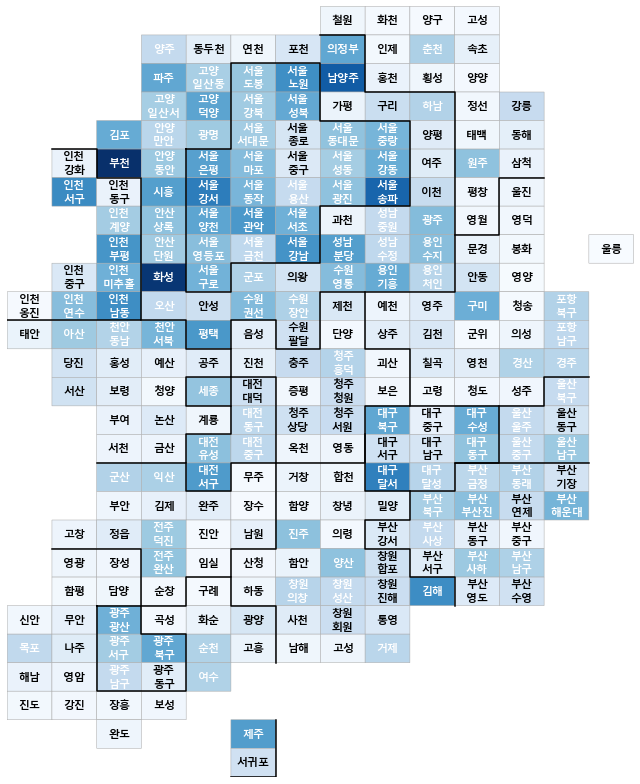

In [52]:
drawKorea('인구수합계',pop, 'Blues')

In [53]:
# True는 1, False는 0으로
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]

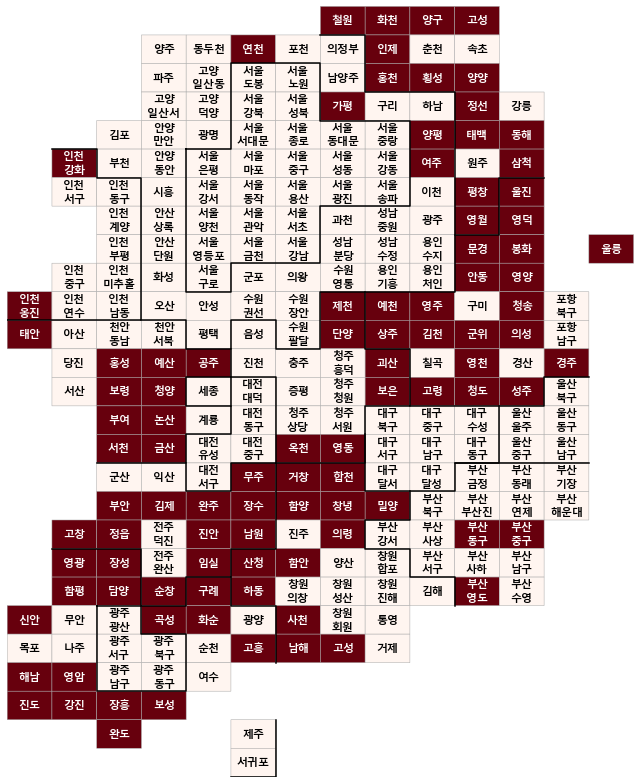

In [54]:
drawKorea('소멸위기지역', pop, 'Reds')

In [55]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)


    for idx, row in blockedMap.iterrows():
       
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

      
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

In [56]:
pop.loc[175]

광역시도             인천
시도             미추홀구
20~39세여자      52588
20~39세합계     110480
65세이상합계       62042
인구수남자        195241
인구수여자        195975
인구수합계        391216
소멸비율        1.69524
소멸위기지역            0
ID           인천 미추홀
y                 9
x                 2
Name: 175, dtype: object

In [57]:
pop.head()

,광역시도,시도,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원,강릉시,20993,46008,40497,101154,101903,203057,1.036768,0,강릉,3,11
1,강원,고성군,1699,4006,7005,11933,11688,23621,0.485082,1,고성(강원),0,10
2,강원,동해시,7510,16311,16152,42093,41795,83888,0.929916,1,동해,4,11
3,강원,삼척시,5280,12428,14953,31630,30203,61833,0.706213,1,삼척,5,11
4,강원,속초시,7411,15928,14010,37488,38814,76302,1.057959,0,속초,1,10


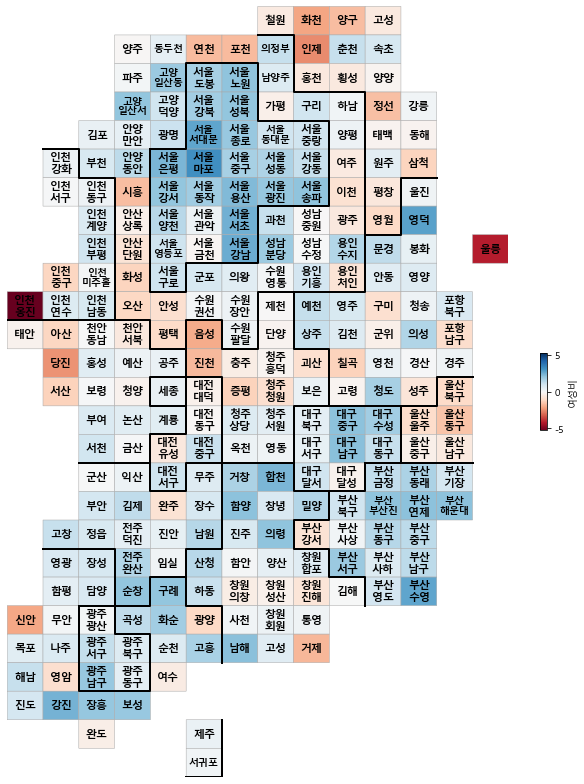

In [58]:
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5)*100
drawKorea('여성비', pop, 'RdBu')

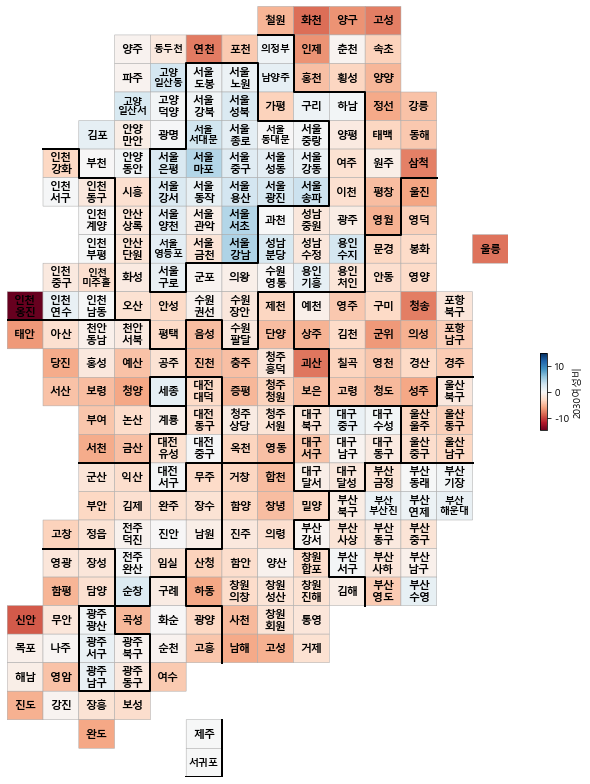

In [59]:
pop['2030여성비'] = (pop['20~39세여자']/pop['20~39세합계'] - 0.5)*100
drawKorea('2030여성비', pop, 'RdBu')

## 지도에 표시하기

In [60]:
pop_folium = pop.set_index('ID')
pop_folium.head()

,광역시도,시도,20~39세여자,20~39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원,강릉시,20993,46008,40497,101154,101903,203057,1.036768,0,3,11,0.184431,-4.370979
고성(강원),강원,고성군,1699,4006,7005,11933,11688,23621,0.485082,1,0,10,-0.518606,-7.588617
동해,강원,동해시,7510,16311,16152,42093,41795,83888,0.929916,1,4,11,-0.177618,-3.957452
삼척,강원,삼척시,5280,12428,14953,31630,30203,61833,0.706213,1,5,11,-1.153915,-7.515288
속초,강원,속초시,7411,15928,14010,37488,38814,76302,1.057959,0,1,10,0.868916,-3.471873


In [61]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [62]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_data,  
               data = pop_folium['인구수합계'],
               columns= [pop_folium.index, pop_folium['인구수합계']],
               fill_color= 'YlGnBu',
               key_on='feature.id'
)
map

In [63]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_data,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

map

In [64]:
draw_korea.to_csv("./results/draw_korea.csv", encoding='utf-8', sep=',')
pop.to_csv("./results/pop.csv", encoding='utf-8', sep=',')